In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_df = pd.read_csv('tytanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

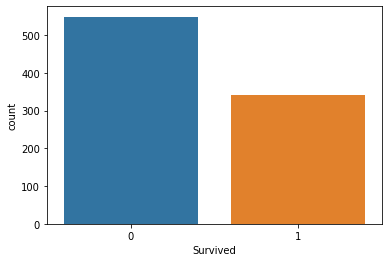

In [4]:
sns.countplot(titanic_df['Survived'])

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count shows here that there are 177 values which are missing in the age column.
We can fill it with the median of the age. I can fill using the mean also but median feels more robust.

In [6]:
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].median())

In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From here we see that age columns missing data is now filled

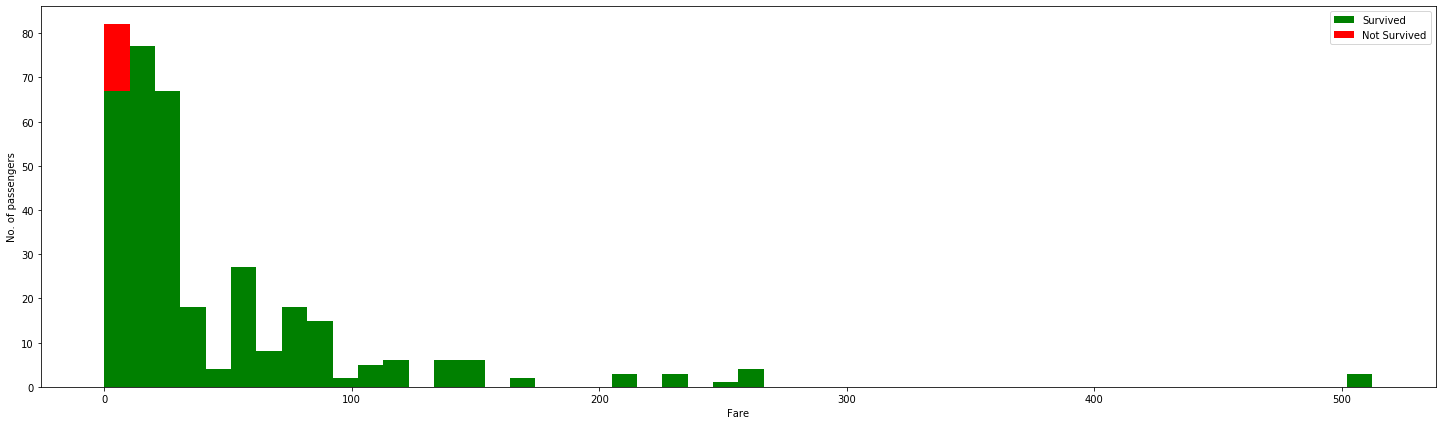

In [8]:
figure = plt.figure(figsize=(25,7))
plt.hist([titanic_df[titanic_df['Survived']==1]['Fare'],titanic_df[titanic_df['Fare']==0]['Fare']],stacked=True, color=['g','r'],bins=50,label=['Survived','Not Survived'])
plt.xlabel('Fare')
plt.ylabel('No. of passengers')
plt.legend()

With this histogram we can say that people who paid more were likely to survive.

In [9]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

By this we know that the embarked column has "S" most of the times repeated. So we can fill the missing values with S in the embarked column

In [10]:
titanic_df['Embarked'].fillna('S', inplace=True)

In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Since Cabin has 687 null values and it is unknown then we can replace the missing values with U as unknown

In [12]:
titanic_df['Cabin'].fillna('U', inplace=True)

In [13]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now we dont have any null values in the dataset

In [14]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Noe we know that the data model will perform well on numerical data so we need to convert the columns to make it numerical

Converting Sex column in the form of Female=0 and Male=1

In [15]:
titanic_df['Sex'].replace(['female','male'],[0,1],inplace=True)

I see Embarked column has 3 things S, C and Q. Lets convert them in numeric data as well. So S=0, C=1 and Q=2

In [16]:
titanic_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [17]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,U,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,U,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1


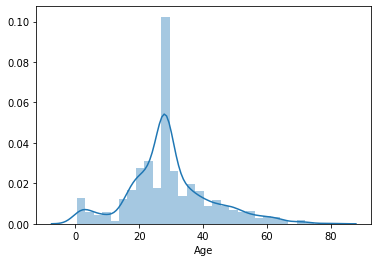

In [18]:
sns.distplot(titanic_df['Age'])

1. From the distribution plot we see that the curve is right skewed but removal of the skewed data might lead to decrease in the accuracy of the model.
2. Maximum people are of the age betweek 15 to 40.

In [19]:
from sklearn.preprocessing import OrdinalEncoder


In [20]:
# Encoding
titanic_df = pd.DataFrame(OrdinalEncoder().fit_transform(titanic_df),columns=titanic_df.columns)

In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,0.0,2.0,108.0,1.0,28.0,1.0,0.0,523.0,18.0,147.0,0.0
1,1.0,1.0,0.0,190.0,0.0,51.0,1.0,0.0,596.0,207.0,81.0,1.0
2,2.0,1.0,2.0,353.0,0.0,34.0,0.0,0.0,669.0,41.0,147.0,0.0
3,3.0,1.0,0.0,272.0,0.0,47.0,1.0,0.0,49.0,189.0,55.0,0.0
4,4.0,0.0,2.0,15.0,1.0,47.0,0.0,0.0,472.0,43.0,147.0,0.0


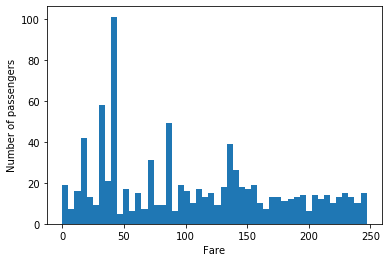

In [22]:
plt.hist(titanic_df['Fare'], bins=50)
plt.xlabel("Fare")
plt.ylabel("Number of passengers")
plt.show()

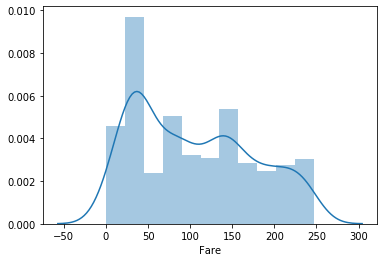

In [23]:
sns.distplot(titanic_df['Fare'])

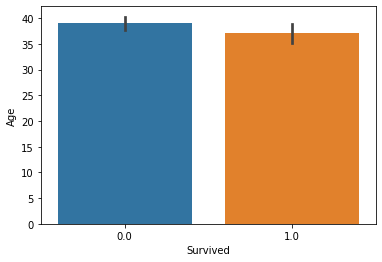

In [24]:
sns.barplot(x=titanic_df['Survived'], y=titanic_df['Age'])

No much difference in the survival rate based on age

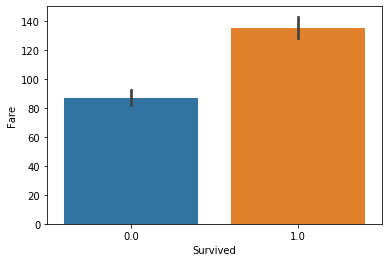

In [25]:
sns.barplot(x=titanic_df['Survived'], y=titanic_df['Fare'])

Higher fare people given preference to take the life boat.

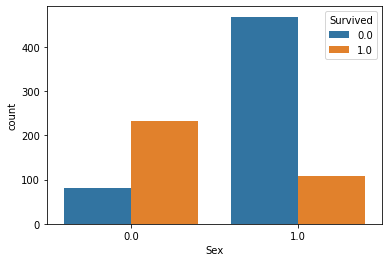

In [26]:
sns.countplot(titanic_df['Sex'],hue=titanic_df['Survived'])

Maximum females survived amd maximum males not survived

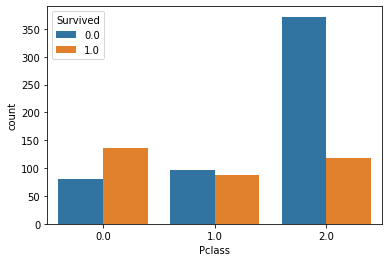

In [27]:
sns.countplot(titanic_df['Pclass'],hue=titanic_df['Survived'])

OBSERVATION: 

First class people some people survived, second class no significant difference found, third class people most of the people died.

In [28]:
titanic_df.drop(['PassengerId','Name'],axis=1, inplace=True)

In [29]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,2.0,1.0,28.0,1.0,0.0,523.0,18.0,147.0,0.0
1,1.0,0.0,0.0,51.0,1.0,0.0,596.0,207.0,81.0,1.0
2,1.0,2.0,0.0,34.0,0.0,0.0,669.0,41.0,147.0,0.0
3,1.0,0.0,0.0,47.0,1.0,0.0,49.0,189.0,55.0,0.0
4,0.0,2.0,1.0,47.0,0.0,0.0,472.0,43.0,147.0,0.0


# Correlation

In [30]:
corr_matrix= titanic_df.corr()

(10.0, 0.0)

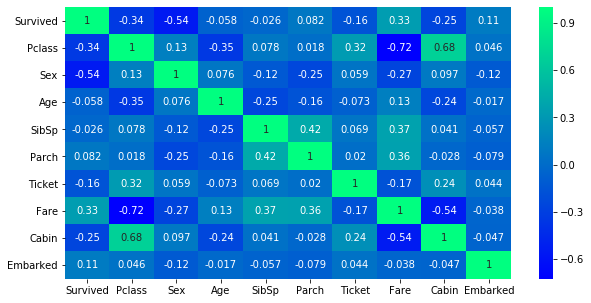

In [31]:
plt.figure(figsize=(10,5))
ax=sns.heatmap(corr_matrix,annot=True,cmap='winter')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Observation

1. Fare is Positive correlated
2. Cabin and Pclass are highly correlated
3. We can drop cabin column as it is less negatively correlated to target.

In [32]:
titanic_df.drop(['Cabin'],axis=1, inplace=True)

In [33]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,2.0,1.0,28.0,1.0,0.0,523.0,18.0,0.0
1,1.0,0.0,0.0,51.0,1.0,0.0,596.0,207.0,1.0
2,1.0,2.0,0.0,34.0,0.0,0.0,669.0,41.0,0.0
3,1.0,0.0,0.0,47.0,1.0,0.0,49.0,189.0,0.0
4,0.0,2.0,1.0,47.0,0.0,0.0,472.0,43.0,0.0


# Preparing the data

In [34]:
# Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing

# separate the data from the target attributes
Y = titanic_df['Survived']
X = titanic_df.drop('Survived',axis=1)
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [35]:
x=pd.DataFrame(normalized_X,columns=X.columns)

In [36]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.003816,0.001908,0.053429,0.001908,0.000000,0.997970,0.034347,0.000000
1,0.000000,0.000000,0.080571,0.001580,0.000000,0.941573,0.327023,0.001580
2,0.002980,0.000000,0.050662,0.000000,0.000000,0.996841,0.061092,0.000000
3,0.000000,0.000000,0.234031,0.004979,0.000000,0.243990,0.941102,0.000000
4,0.004199,0.002100,0.098680,0.000000,0.000000,0.991004,0.090282,0.000000
...,...,...,...,...,...,...,...,...
886,0.007322,0.007322,0.256268,0.000000,0.000000,0.739515,0.622364,0.000000
887,0.000000,0.000000,0.154338,0.000000,0.000000,0.090031,0.983908,0.000000
888,0.002905,0.000000,0.052284,0.001452,0.002905,0.980331,0.190257,0.000000
889,0.000000,0.006372,0.216640,0.000000,0.000000,0.050974,0.974878,0.006372


# Scaling

Scaling the data set using standard scaler

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledX = sc.fit_transform(X)

Trying out the best model to be selected

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 86.09865470852019 found at random state 93 


In [40]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 83.85650224215246 found at random state 58 


In [41]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=KNeighborsClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 85.20179372197309 found at random state 45 


In [42]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=SVC()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 86.99551569506725 found at random state 46 


In [43]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=AdaBoostClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 86.09865470852019 found at random state 64 


In [44]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 86.54708520179372 found at random state 72 


In [45]:
best_rstate=0
accu=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=i)
    mod=GradientBoostingClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu*100} found at random state {best_rstate} ")

Best Accuracy 88.34080717488789 found at random state 74 


Gradient boosting has the maximum accuracy

In [46]:
x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.20,random_state=74)
Best_Model = GradientBoostingClassifier()
parameters={"loss":['deviance', 'exponential'],"n_estimators":[100,200,300],"criterion":['friedman_mse', 'mse', 'mae']}
gs=GridSearchCV(Best_Model,parameters)
gs.fit(x_train,y_train)
gs.best_estimator_.get_params()

{'criterion': 'mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Default values have the best results so we no need to change the parameters

# Finalsing Gradient Boosting classifier model

In [47]:
x_train,x_test,y_train,y_test=train_test_split(scaledX,Y,test_size=0.25,random_state=74)
mod=GradientBoostingClassifier()
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)
tempaccu=accuracy_score(y_test,y_pred)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[127  20]
 [  6  70]]
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.91       147
         1.0       0.78      0.92      0.84        76

    accuracy                           0.88       223
   macro avg       0.87      0.89      0.88       223
weighted avg       0.89      0.88      0.89       223



In [48]:
from sklearn.model_selection import cross_val_score


In [49]:
score = cross_val_score(mod,X,Y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))

std: 0.0
cross_val_score: 83.66098133728835


our model is neither underfitting nor overfitting

So we can release this model

In [50]:
import joblib

In [51]:
joblib.dump(mod,'titanic_Grad_Boost_Classifier.pkl')

['titanic_Grad_Boost_Classifier.pkl']